In [1]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\RAUNAQUE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


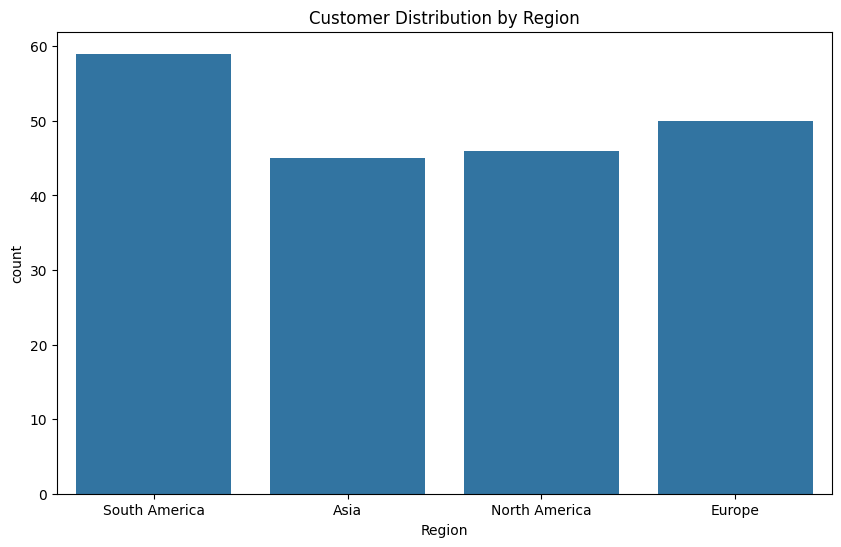

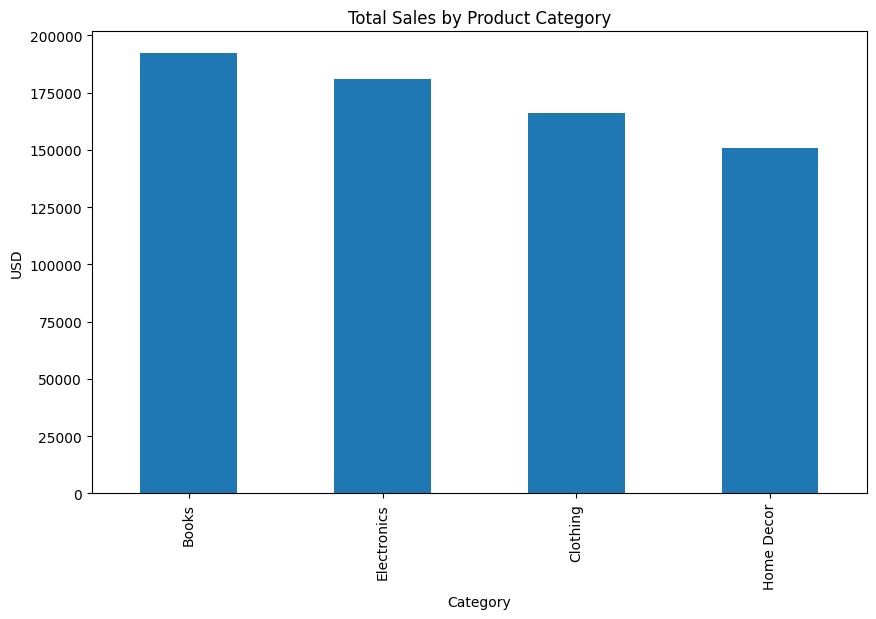

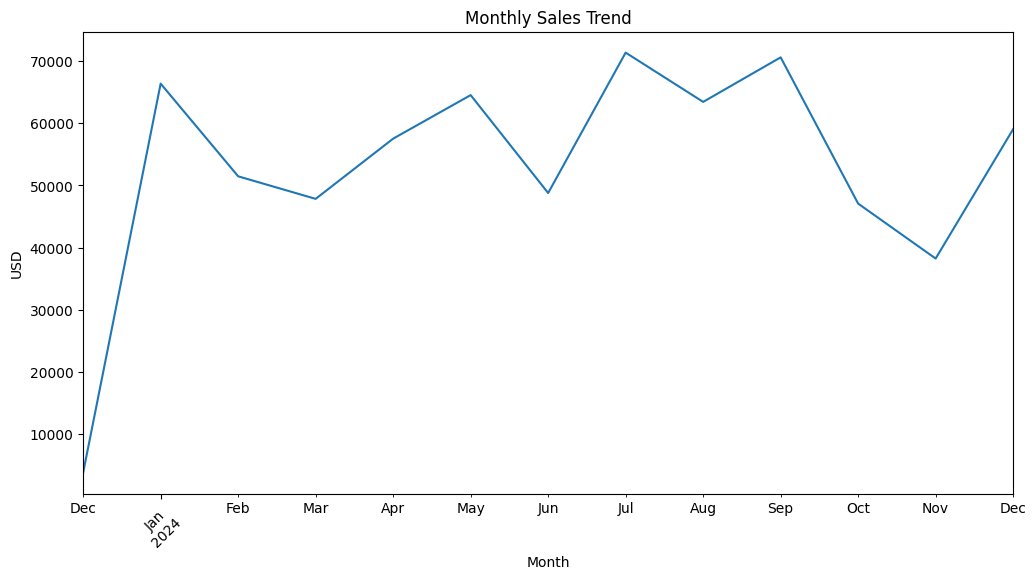

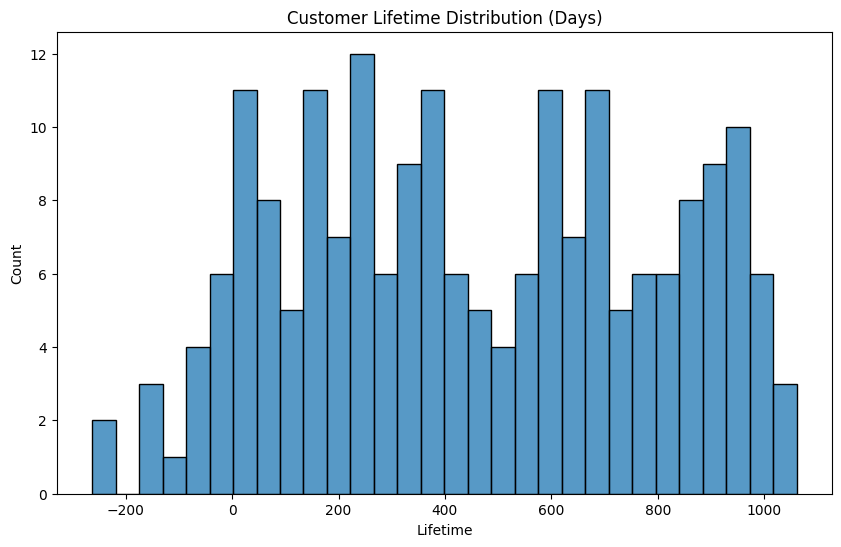

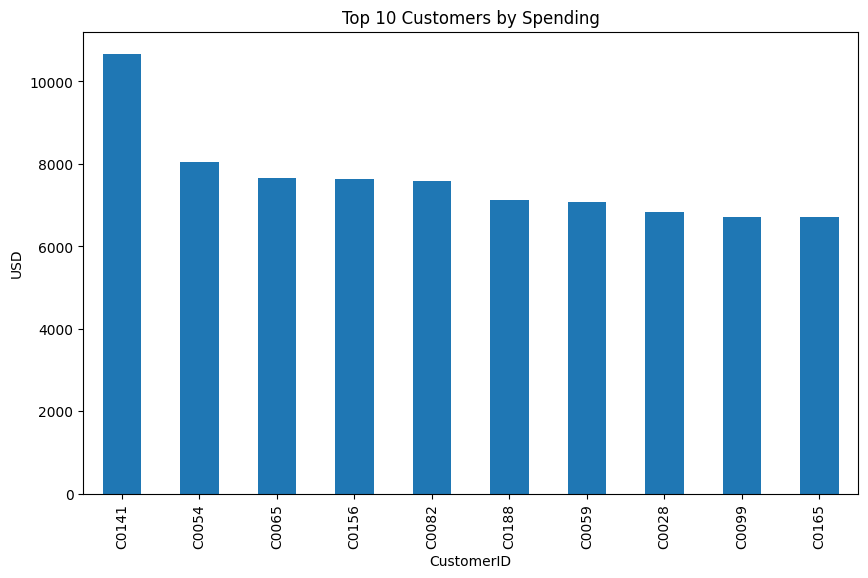

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv(r"C:\Users\RAUNAQUE\Desktop\the\Customers.csv")
products = pd.read_csv(r"C:\Users\RAUNAQUE\Desktop\the\Products.csv")
transactions = pd.read_csv(r"C:\Users\RAUNAQUE\Desktop\the\Transactions.csv")

print("Missing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

merged = pd.merge(transactions, products, on='ProductID')
category_sales = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('USD')
plt.show()

transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.show()

last_transaction = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
merged_lifetime = pd.merge(customers, last_transaction, on='CustomerID')
merged_lifetime['Lifetime'] = (merged_lifetime['TransactionDate'] - merged_lifetime['SignupDate']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(merged_lifetime['Lifetime'], bins=30)
plt.title('Customer Lifetime Distribution (Days)')
plt.show()

top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Spending')
plt.ylabel('USD')
plt.show()
